## Assignment 2 Model Fitting with Maximum Likelihood 
### The purpose of this assignment is to learn how to write a log likelihood function, fit models to data with maximum likelihood and to select among models using AIC (or BIC)


###  Deadline: Friday 10/27


In [125]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

In [126]:
def shiftedwald(params, x):
    '''
    params: is a list or numpy array containing two parameters
    x: are the data
    '''
 
    gamma = params[0] #drift rate
    alpha = params[1] #boundary separation
    theta = params[2] #shift or nondecision time 
    x = x-theta
    z = alpha/np.sqrt(2*np.pi*(x**3))
    w = ((np.abs(alpha-gamma*x))**2)/(2*x)
    f = z*np.exp(-w)
    return f

## Problem 1 
### Use the shifted Wald distribution defined above.  Write a function which computes the negative log likelihood 
### of the shifted Wald distribution.  Assume that the data to be analyzed is in a variable called data. 
### The function should return negative log likelihood 

In [127]:
def negloglikeWald(params, data):
    subset_data = data[data['Subject'] == 1]['ReactionTime'].values
    negloglike = -np.sum(np.log(shiftedwald(params, subset_data)))
    return negloglike 

## Problem 2 
### Using the function the negative log-likelihood that you developed in problem 1, fit the shifted Wald distribution to the data for ALL the subjects in ReactionTimeData.csv.  
### You should consider two models: 
### Model A: All of the data comes from a single distribution. 
### Model B: The data in each condition (Easy, Medium, Hard) comes from a separate distribution. 

### When I did this, I chose to use the function `least_squares` in the scipy.optimize module, and my call looked like this. 
    data = rt([correct == 1])
    paramfit = least_squares(negloglikeWald,[0.1,80,250],bounds = ([0,0,0],np.inf),max_nfev=50000)
### I highly recommend that you investigate what least_squares does, its a super useful function.  
### If you run into problems with your computer taking too long, reduce the amount of data, even do just 1 or a few subjects.
### Remember, this model is only valid for correct responses. 
### Make a plot or table or something to show me (make it pretty!) how the resulting parameter fits turned out.  

/var/folders/bz/60kv57w90bnf_xcm4ppjvst40000gn/T/ipykernel_6082/4095274295.py:3: RuntimeWarning: divide by zero encountered in log
  negloglike = -np.sum(np.log(shiftedwald(params, subset_data)))


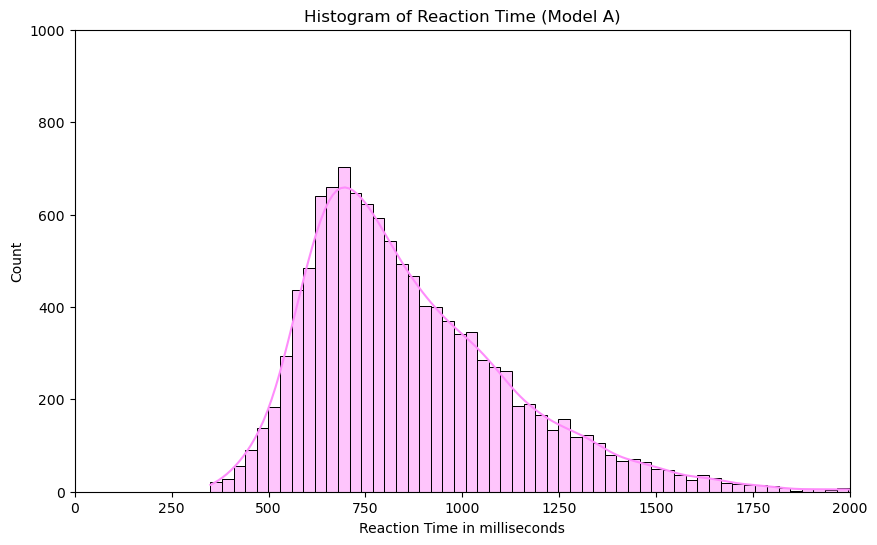

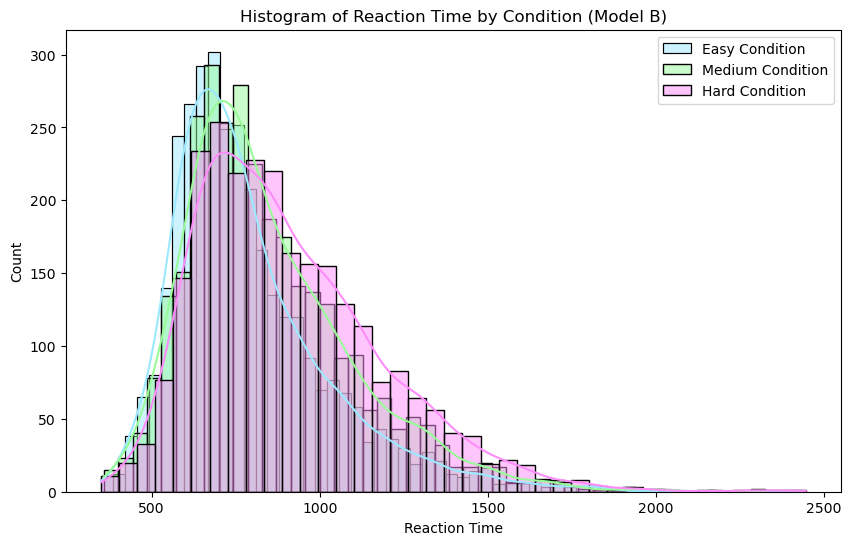

In [128]:
import pandas as pd
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("ReactionTimeData.csv")

# code and plot for Model A

correct_data = data[data['Correct'] == 1]

initial_params = [0.1, 80, 250]

leastSqParam = least_squares(negloglikeWald,initial_params, args=(correct_data,), max_nfev=25000)


plt.figure(figsize=(10, 6))
sns.histplot(data=data['ReactionTime'], kde=True, color="#FE8CFB")
plt.title("Histogram of Reaction Time (Model A)")
plt.xlabel("Reaction Time in milliseconds")
plt.ylabel("Count")
plt.xlim(0, 2000) 
plt.ylim(0, 1000)
plt.show()


# code and plot for Model B

easy_data = data[(data['Correct'] == 1) & (data['Condition'] == 'Easy')]['ReactionTime']
medium_data = data[(data['Correct'] == 1) & (data['Condition'] == 'Medium')]['ReactionTime']
hard_data = data[(data['Correct'] == 1) & (data['Condition'] == 'Hard')]['ReactionTime']

plt.figure(figsize=(10, 6))
sns.histplot(data=easy_data, kde=True, color= "#9BE8FF", label="Easy Condition")
sns.histplot(data=medium_data, kde=True, color= "#98FB98", label="Medium Condition")
sns.histplot(data=hard_data, kde=True, color= "#FE8CFB", label="Hard Condition")
             
plt.title("Histogram of Reaction Time by Condition (Model B)")
plt.xlabel("Reaction Time")
plt.ylabel("Count")
plt.legend()
plt.show()


 ## Problem 3 
### Use AIC to evaluate which model you should prefer.  Are all the data from 1 distribution or from three different distributions? 

In [129]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares

data = pd.read_csv("ReactionTimeData.csv")

# AIC for Model A
correct_data = data[data['Correct'] == 1]

initial_params = [0.1, 80, 250]
leastSqParam = least_squares(negloglikeWald, initial_params, args=(correct_data,))

k_model_a = len(initial_params)
neg_log_likelihood_A = negloglikeWald(leastSqParam.x, correct_data)
aic_ModelA = (2 * k_model_a) - (2 * neg_log_likelihood_A)
print("AIC for Model A:", aic_ModelA)


# AIC for Model B
easy_data = data[data['Condition'] == 'Easy']
medium_data = data[data['Condition'] == 'Medium']
hard_data = data[data['Condition'] == 'Hard']

params_easy = least_squares(negloglikeWald, initial_params, args=(easy_data,))
params_medium = least_squares(negloglikeWald, initial_params, args=(medium_data,))
params_hard = least_squares(negloglikeWald, initial_params, args=(hard_data,))

k_model_b = len(initial_params)

aic_easy = 2 * k_model_b - 2 * np.log(np.exp(-negloglikeWald(params_easy.x, easy_data)))

aic_medium = 2 * k_model_b - 2 * np.log(np.exp(-negloglikeWald(params_medium.x, medium_data)))

aic_hard = 2 * k_model_b - 2 * np.log(np.exp(-negloglikeWald(params_hard.x, hard_data)))


print("AIC for Model B (Easy):", aic_easy)
print("AIC for Model B (Medium):", aic_medium)
print("AIC for Model B (Hard):", aic_hard)


print("Model B is more favorable over Model A as it has lower AIC values compared to the AIC for \nModel A. Model B has three separate distributions, while Model A comes from one single distribution.")




/var/folders/bz/60kv57w90bnf_xcm4ppjvst40000gn/T/ipykernel_6082/4095274295.py:3: RuntimeWarning: divide by zero encountered in log
  negloglike = -np.sum(np.log(shiftedwald(params, subset_data)))


AIC for Model A: -1802.4087080643126
AIC for Model B (Easy): 1037.6990792532717
AIC for Model B (Medium): 921.7806364149003
AIC for Model B (Hard): 862.576566977104
Model B is more favorable over Model A as it has lower AIC values compared to the AIC for 
Model A. Model B has three separate distributions, while Model A comes from one single distribution.


## Problem 4 
### The two models given above are not the only models you could propose.  
### The original idea of this experiment was to manipulate drift rate in order to find brain activity related to speed of information processing. 
### So, our hypothesis was that non-decision time, and boundary would be the same for all conditions, and only the drift rate would vary.  
### Write a function for negative log likelihood for a model that keeps boundary (alpha) and non-decision time (theta) the same for all 3 conditions, but allows drift rate (gamma) to vary. 
### Hint: In this model there are now 5 parameters - gamma_easy, gamma_medium, gamma_hard, alpha, theta. 
### Hint: The likelihood should be evaluated using the correct gamma for each condition, and using the sama alpha and theta for all condition.  

In [130]:

def negloglikeVaryingDrift(params, data):
    gamma_easy, gamma_medium, gamma_hard, alpha, theta = params
    
    conditions = data['Condition'].unique()
    total_negloglike = 0
    
    for condition in conditions:
        subset_data = data[data['Condition'] == condition]['ReactionTime']
        condition_params = [gamma_easy, gamma_medium, gamma_hard][conditions.index(condition)]
        negloglike = -np.sum(np.log(shiftedwald([condition_params, alpha, theta], subset_data)))
        total_negloglike += negloglike
    
    return total_negloglike

